In [3]:
import numpy as np
import keras
from keras.models import Sequential
import tensorflow as tf
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
dataset=np.loadtxt("lstm_in500_out10_d100_x0.1_r4.csv", delimiter=",")


i_lenght=500
o_lenght=10
data=dataset[:,0:i_lenght].copy()
label=dataset[:,i_lenght:].copy()

print(data.shape,label.shape)

dtrain,dtest,ltrain,ltest=train_test_split(data,label,train_size=0.7,random_state=1)


(100, 500) (100, 10)


/home/ana/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
30/30 [==============================] - 0s 6ms/step
0.1245867982506752
n: 10 
 mse: 0.1245867982506752


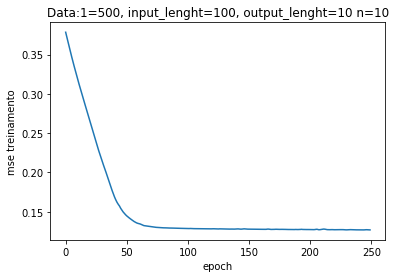

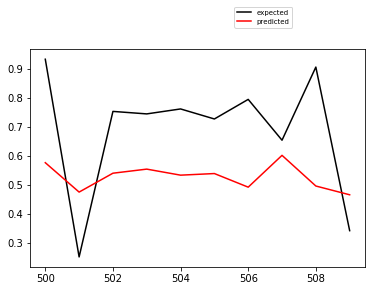

30/30 [==============================] - 0s 7ms/step
nan
n: 15 
 mse: nan


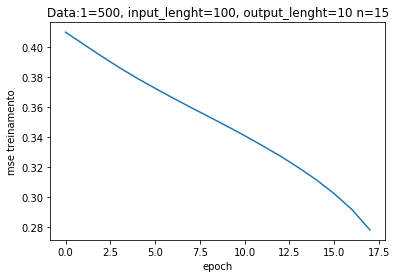

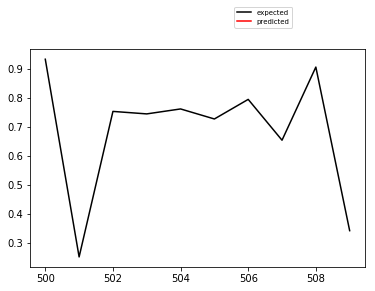

30/30 [==============================] - 0s 6ms/step
nan
n: 20 
 mse: nan


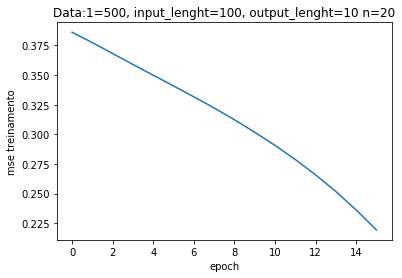

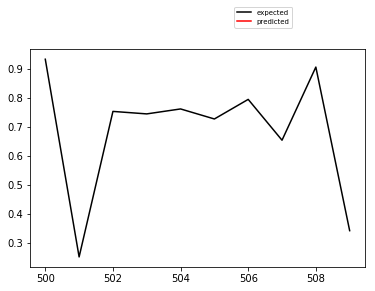

30/30 [==============================] - 0s 7ms/step
nan
n: 25 
 mse: nan


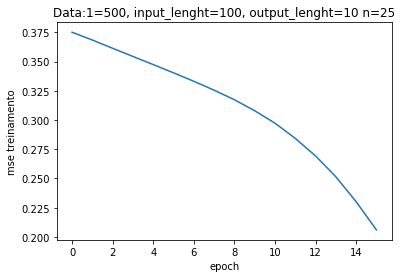

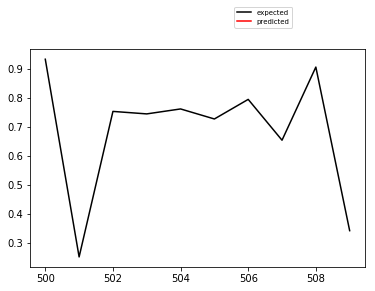

30/30 [==============================] - 0s 6ms/step
0.12868864834308624
n: 30 
 mse: 0.12868864834308624


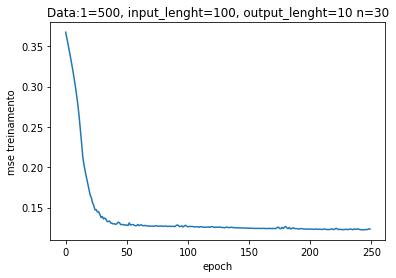

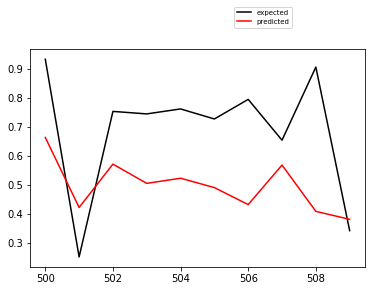

30/30 [==============================] - 0s 2ms/step
nan
n: 35 
 mse: nan


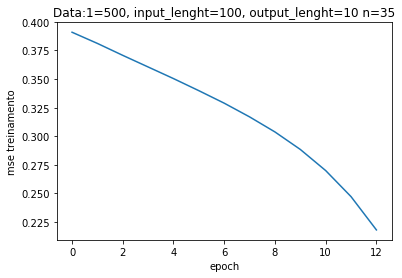

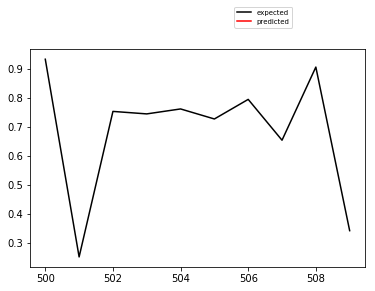

30/30 [==============================] - 0s 2ms/step
nan
n: 40 
 mse: nan


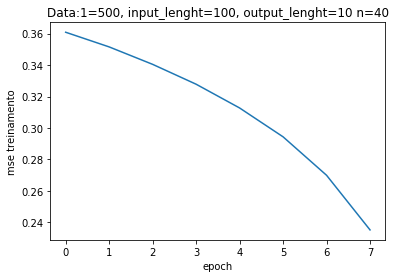

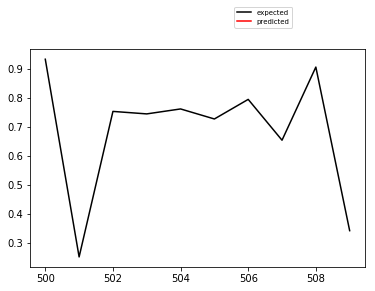

30/30 [==============================] - 0s 3ms/step
nan
n: 45 
 mse: nan


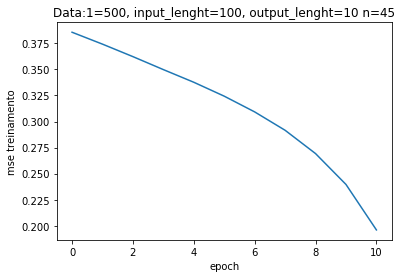

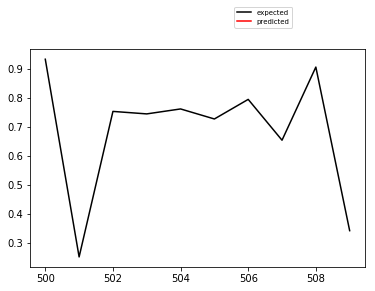

30/30 [==============================] - 0s 4ms/step
nan
n: 50 
 mse: nan


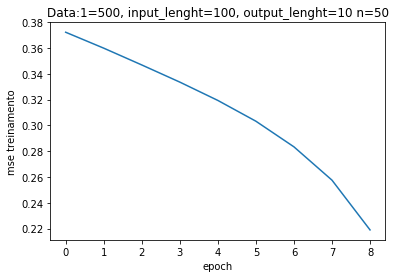

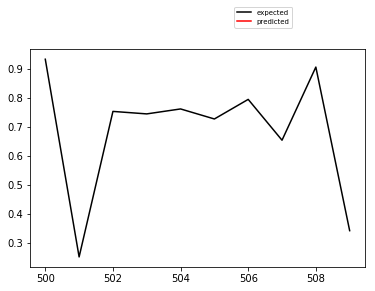

30/30 [==============================] - 0s 4ms/step
nan
n: 60 
 mse: nan


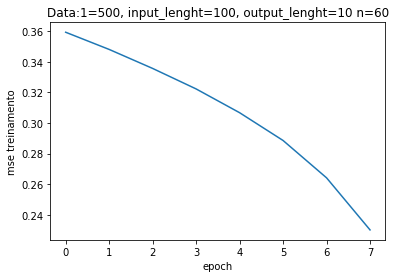

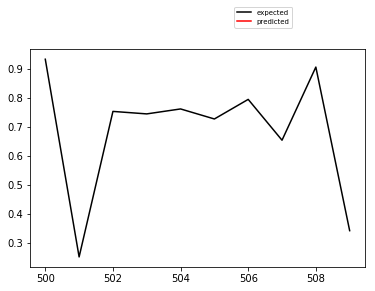

30/30 [==============================] - 0s 4ms/step
nan
n: 70 
 mse: nan


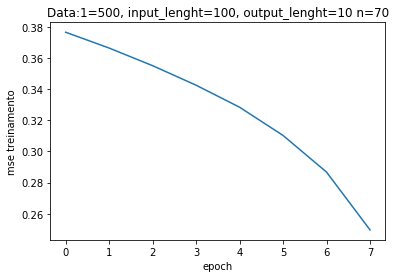

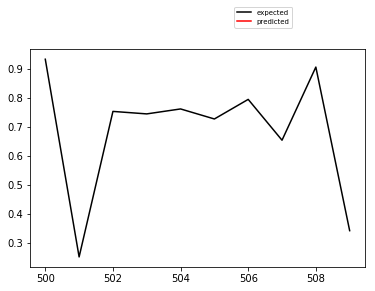

30/30 [==============================] - 0s 4ms/step
nan
n: 80 
 mse: nan


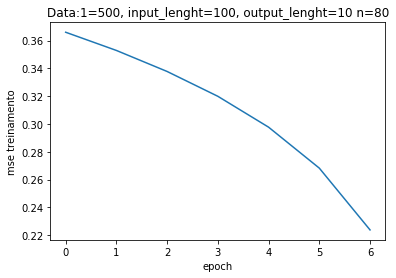

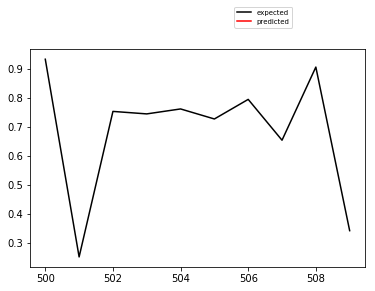

30/30 [==============================] - 0s 4ms/step
nan
n: 90 
 mse: nan


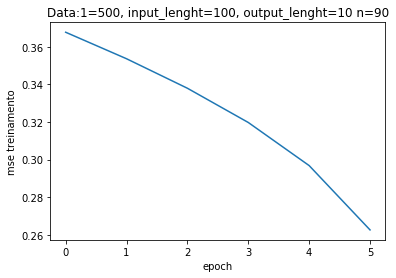

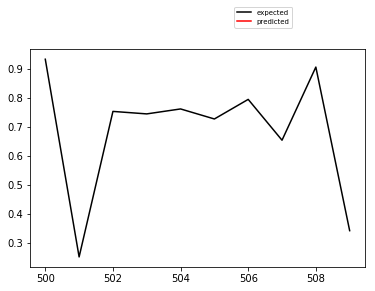

30/30 [==============================] - 0s 4ms/step
nan
n: 100 
 mse: nan


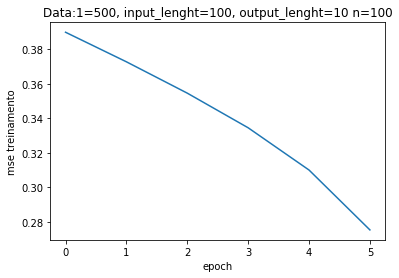

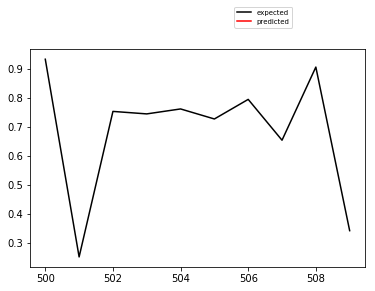

30/30 [==============================] - 0s 6ms/step
nan
n: 200 
 mse: nan


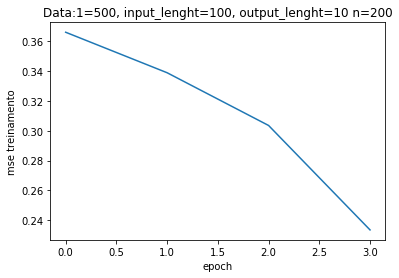

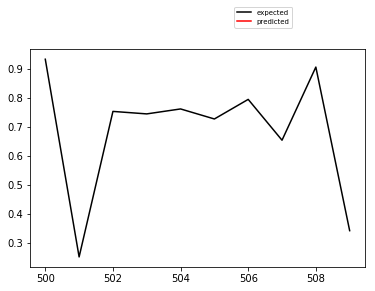

30/30 [==============================] - 0s 7ms/step
nan
n: 300 
 mse: nan


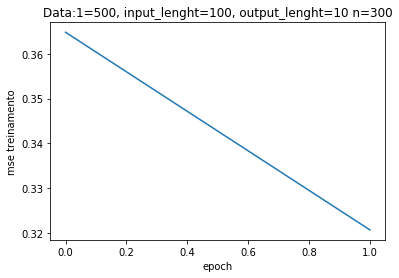

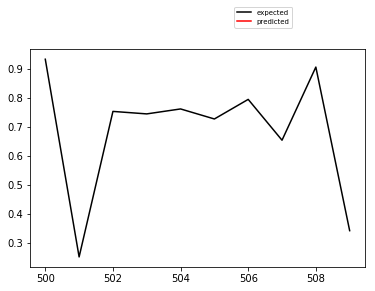

30/30 [==============================] - 0s 8ms/step
nan
n: 400 
 mse: nan


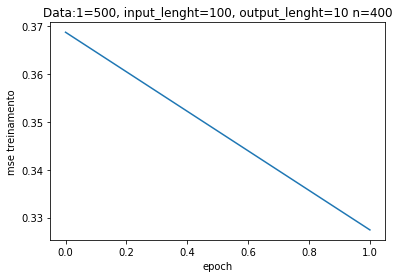

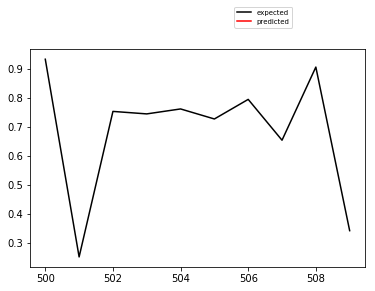

30/30 [==============================] - 0s 11ms/step
nan
n: 500 
 mse: nan


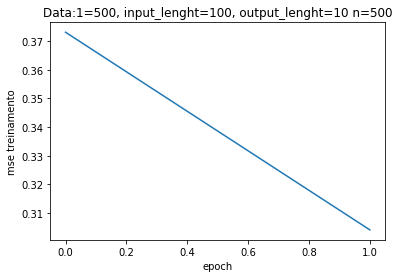

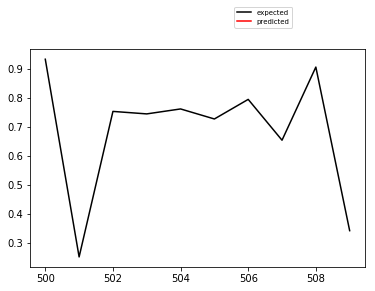

30/30 [==============================] - 0s 13ms/step
nan
n: 600 
 mse: nan


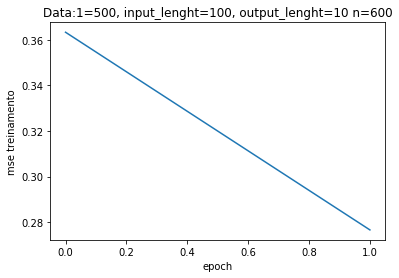

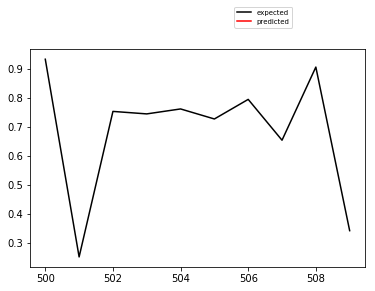

30/30 [==============================] - 1s 43ms/step
nan
n: 700 
 mse: nan


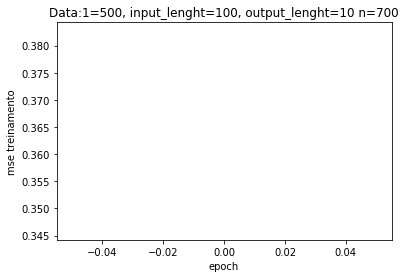

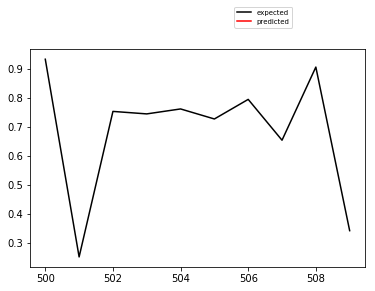

30/30 [==============================] - 1s 46ms/step
nan
n: 800 
 mse: nan


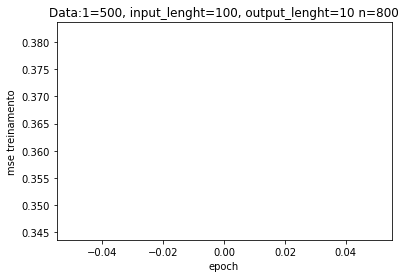

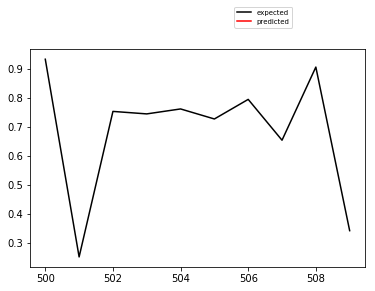

30/30 [==============================] - 1s 28ms/step
nan
n: 900 
 mse: nan


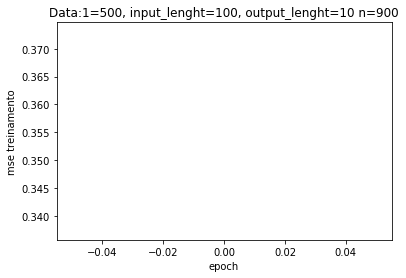

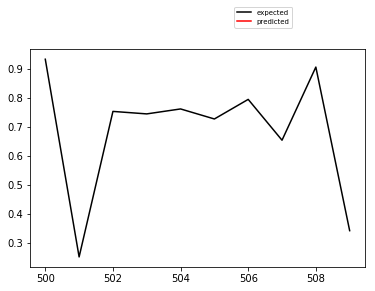

30/30 [==============================] - 1s 41ms/step
nan
n: 1000 
 mse: nan


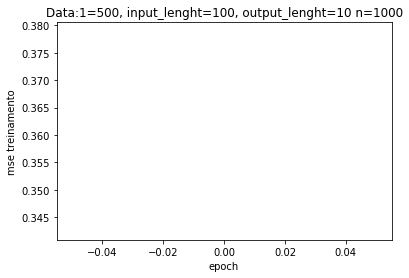

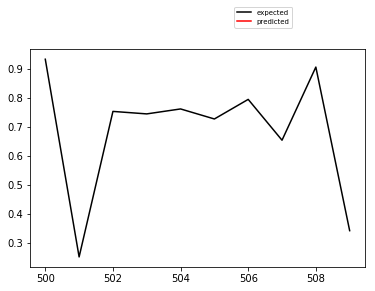

[(10, 0.12679899462631772, 0.1245867982506752), (15, nan, nan), (20, nan, nan), (25, nan, nan), (30, 0.12246358564921787, 0.12868864834308624), (35, nan, nan), (40, nan, nan), (45, nan, nan), (50, nan, nan), (60, nan, nan), (70, nan, nan), (80, nan, nan), (90, nan, nan), (100, nan, nan), (200, nan, nan), (300, nan, nan), (400, nan, nan), (500, nan, nan), (600, nan, nan), (700, nan, nan), (800, nan, nan), (900, nan, nan), (1000, nan, nan)]


In [5]:
results = []

n = 10
while n<=1000:
    
    model = Sequential()
    model.add(keras.layers.LSTM(n, activation='relu', input_shape=(i_lenght, 1)))
    model.add(keras.layers.Dense(o_lenght)) 

    model.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')
    
    dtrain = dtrain.reshape((dtrain.shape[0],i_lenght,1))

    dtest = dtest.reshape((dtest.shape[0],i_lenght,1))
    
    history = model.fit(dtrain, ltrain, epochs=250,verbose=0)
    
    msetrain = model.evaluate(dtrain, ltrain)
    mse = model.evaluate(dtest, ltest)
    print(mse)
    
    line = np.empty((3))
    line = n, msetrain, mse
    
    results.append(line)
    
    print('n:',n,'\n mse:',mse)
    
    plt.plot(history.history['loss'])
    plt.title('Data:1=500, input_lenght=100, output_lenght=10 n=%d' %n)
    plt.ylabel('mse treinamento')
    plt.xlabel('epoch')
    plt.show()
    
    prediction = model.predict(dtest[0,:].reshape((1,i_lenght,1)))
    
    
    plt.plot(range(i_lenght,i_lenght+o_lenght),ltest[0,:],'k',label="expected")
    plt.plot(range(i_lenght,i_lenght+o_lenght),prediction.T,'r', label="predicted")
    lo,hi = plt.ylim()
    #plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
    plt.legend(loc=(0.61,1.1),fontsize='x-small')
    plt.show()
    
    if n < 50:
        n = n+5
    elif n < 100:
        n = n+10
    elif n < 1000:
        n = n+100
    else:
        n = n+1000
        
print(results)
            


    


[[1.00000000e+01 1.26798995e-01 1.24586798e-01]
 [1.50000000e+01            nan            nan]
 [2.00000000e+01            nan            nan]
 [2.50000000e+01            nan            nan]
 [3.00000000e+01 1.22463586e-01 1.28688648e-01]
 [3.50000000e+01            nan            nan]
 [4.00000000e+01            nan            nan]
 [4.50000000e+01            nan            nan]
 [5.00000000e+01            nan            nan]
 [6.00000000e+01            nan            nan]
 [7.00000000e+01            nan            nan]
 [8.00000000e+01            nan            nan]
 [9.00000000e+01            nan            nan]
 [1.00000000e+02            nan            nan]
 [2.00000000e+02            nan            nan]
 [3.00000000e+02            nan            nan]
 [4.00000000e+02            nan            nan]
 [5.00000000e+02            nan            nan]
 [6.00000000e+02            nan            nan]
 [7.00000000e+02            nan            nan]
 [8.00000000e+02            nan         

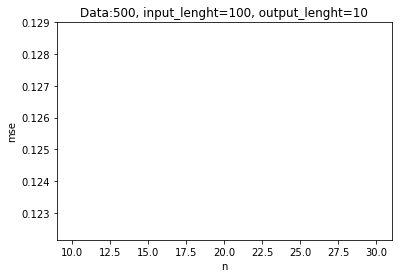

In [6]:
results = np.asarray(results)

print(results)
results_c=results.copy()

plt.plot(results[:,0],results[:,1], 'k',label='train')
plt.title('Data:500, input_lenght=100, output_lenght=10')
plt.ylabel('mse ')
plt.xlabel('n')

plt.plot(results[:,0],results[:,2],'g',label='test')
plt.title('Data:500, input_lenght=100, output_lenght=10')
plt.ylabel('mse')
plt.xlabel('n')
          
          
plt.show()